In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import gradio as gr

In [328]:
data=pd.read_csv("loan.csv")

In [329]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [330]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [331]:
data= data.dropna()

In [332]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [333]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [334]:
data.shape

(480, 13)

In [335]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


<Axes: xlabel='Gender', ylabel='LoanAmount'>

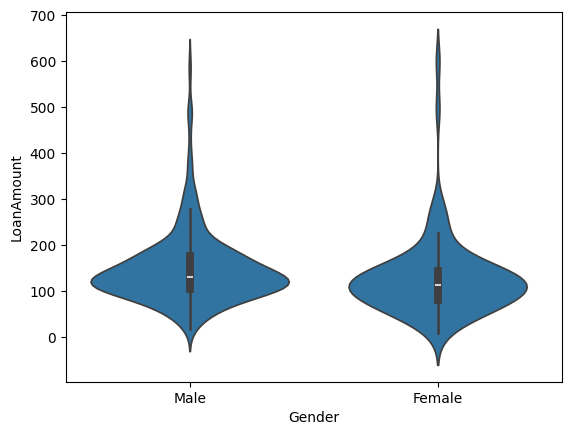

In [336]:
sns.violinplot(x='Gender',y='LoanAmount',data=data)

<Axes: xlabel='Self_Employed', ylabel='LoanAmount'>

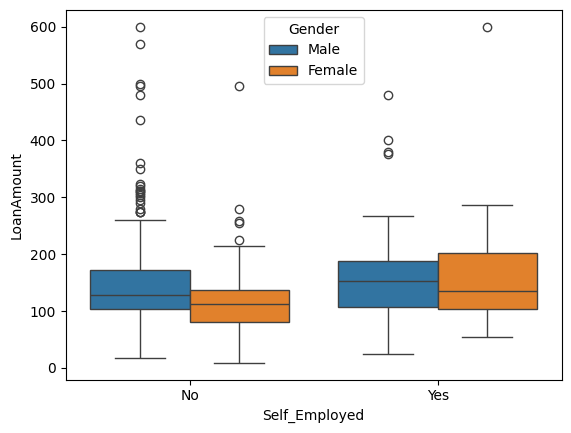

In [337]:
sns.boxplot(x='Self_Employed',y='LoanAmount',hue='Gender',data=data)

In [338]:
data.replace({"Gender":{"Male":1,"Female":0}},inplace=True)

In [339]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,1,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

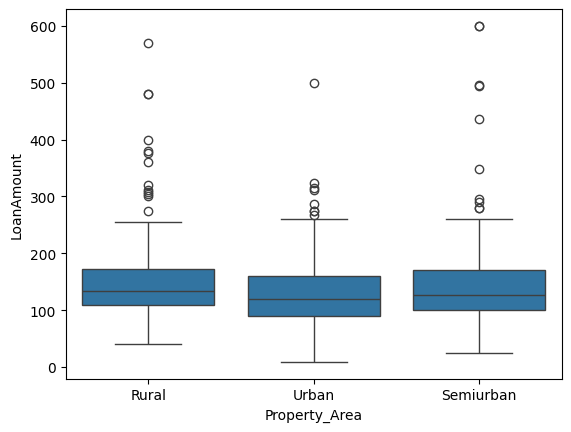

In [340]:
sns.boxplot(x='Property_Area',y='LoanAmount',data=data)

<Axes: xlabel='Education', ylabel='LoanAmount'>

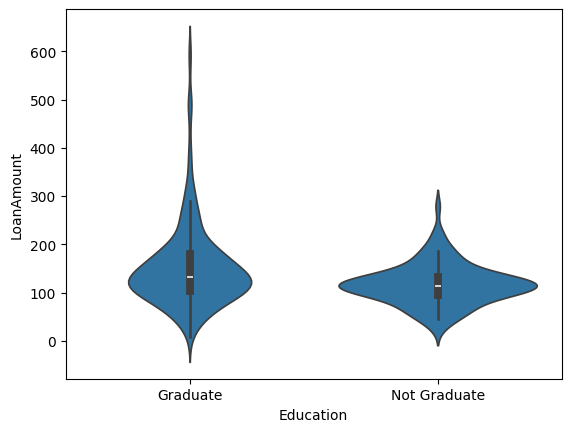

In [341]:
sns.violinplot(x='Education',y='LoanAmount',data=data)

In [342]:
data['Education'].value_counts()

Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64

In [343]:
data.replace({"Education":{"Graduate":1,"Not Graduate":0}},inplace=True)

In [344]:
data['Self_Employed'].value_counts()

Self_Employed
No     414
Yes     66
Name: count, dtype: int64

In [345]:
data.replace({"Self_Employed":{"Yes":1,"No":0}},inplace=True)

In [346]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,Yes,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,Yes,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,Yes,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,No,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,1,Yes,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [347]:
data['Married'].value_counts()

Married
Yes    311
No     169
Name: count, dtype: int64

In [348]:
data.replace({"Married":{"Yes":1,"No":0}},inplace=True)

In [349]:
data.replace({"Loan_Status":{"Y":1,"N":0}},inplace=True)

In [350]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,1


In [351]:
data=data.drop("Loan_ID",axis=1)

In [352]:
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,1


In [353]:
data['Property_Area'].value_counts()

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64

In [354]:
data.replace({"Property_Area":{"Semiurban":1,"Rural":0,"Urban":2}},inplace=True)

In [355]:
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [356]:
data.replace({"Dependents":{"3+":4}},inplace=True)

In [357]:
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [358]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    int64  
 4   Self_Employed      480 non-null    int64  
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    int64  
 11  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 48.8+ KB


In [359]:
data.replace({"Dependents":{"1":1,"2":2,"3":3,"3+":4,"0":0}},inplace=True)

In [360]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Dependents         480 non-null    int64  
 3   Education          480 non-null    int64  
 4   Self_Employed      480 non-null    int64  
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    int64  
 11  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 48.8 KB


<Axes: >

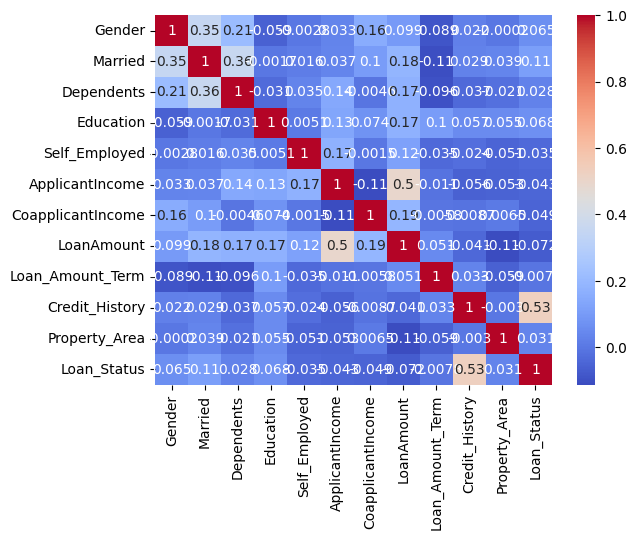

In [361]:
tc=data.corr()
sns.heatmap(tc,annot=True,cmap='coolwarm')


In [362]:
X=data.drop('Loan_Status',axis=1)
Y=data['Loan_Status']

In [363]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,stratify=Y,random_state=42)

In [364]:
rf=RandomForestClassifier()

In [365]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [366]:
data_predict=rf.predict(x_test)

In [367]:
from sklearn.metrics import accuracy_score

In [368]:
print("The accuracy of my model is ",accuracy_score(y_test,data_predict))

The accuracy of my model is  0.7924528301886793


In [369]:
def fun1(Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmount_Term,Credit_History,Property_Area):
    input_arrays=[Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmount_Term,Credit_History,Property_Area]
    array_numpy=np.array(input_arrays)
    array_reshape=array_numpy.reshape(1,-1)
    ans=rf.predict(array_reshape)
    if(ans[0]==1):
        return "YES"
    else:
        return "NO"

In [370]:
outputs=gr.outputs.Textbox()
app=gr.Interface(fn=fun1,inputs=[gr.Dropdown(choices=(("Male",1),("Female",0))),gr.Dropdown(choices=(("Yes",1),("No",0))),gr.Textbox(info="Enter number of persons depends on u financially"),gr.Dropdown(choices=(("Graduate",1),("Not Graduate",0))),gr.Dropdown(choices=(("Yes",1),("No",0))),gr.Textbox(info="Enter income per month"),'number','number',gr.Textbox(info="Enter in number of days"),gr.Dropdown(choices=(("Yes",1),("No",0))),gr.Dropdown(choices=(("Urban",2),("Semi-Urban",1),("Rural",0)))],outputs=['text'],title="LOAN PREDICTION",theme=gr.themes.Monochrome())

C:\Users\gintu\AppData\Local\Temp\ipykernel_24324\4242024106.py:1: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  outputs=gr.outputs.Textbox()


In [371]:
app.launch()

Running on local URL:  http://127.0.0.1:7877

To create a public link, set `share=True` in `launch()`.


In [372]:
inputsss=[1,1,0,1,1,3001,0,66,360,1,2]
inputsss_array=np.array(inputsss)
x=rf.predict(inputsss_array.reshape(1,-1))
print(x[0])

1


C:\Users\gintu\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


C:\Users\gintu\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
Traceback (most recent call last):
  File "C:\Users\gintu\AppData\Roaming\Python\Python311\site-packages\gradio\routes.py", line 544, in predict
    output = await route_utils.call_process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gintu\AppData\Roaming\Python\Python311\site-packages\gradio\route_utils.py", line 217, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gintu\AppData\Roaming\Python\Python311\site-packages\gradio\blocks.py", line 1553, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gintu\AppData\Roaming\Python\Python311\site-packages\gradio\blocks.py", line 1191, in call_function
    prediction = a